# 1. data preprocessing

In [1]:
# 필요한 라이브러리 설치
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import hmean


In [2]:
# 데이터 파일 불러오기
file_name = '/Users/limdonggeon/Desktop/SNU_FINTECH/Statics_DataScience_Statics/team_project/lendingclub_train.dta'
df = pd.read_stata(file_name)

In [3]:
df.shape

(874335, 334)

In [4]:
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_columns', None)
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 874335 entries, 0 to 874334
Data columns (total 334 columns):
 #    Column                            Dtype  
---   ------                            -----  
 0    index                             int32  
 1    loan_amnt                         int32  
 2    funded_amnt                       int32  
 3    funded_amnt_inv                   float64
 4    int_rate                          float64
 5    installment                       float64
 6    annual_inc                        float64
 7    dti                               float64
 8    delinq_2yrs                       int8   
 9    fico_range_low                    int16  
 10   fico_range_high                   int16  
 11   inq_last_6mths                    int8   
 12   open_acc                          int16  
 13   pub_rec                           int8   
 14   revol_bal                         int32  
 15   revol_util                        float64
 16   total_acc         

In [5]:
df.columns

Index(['index', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low',
       'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens', 'emp_length1', 'emp_length2',
       'emp_length3', 'emp_length4', 'emp_length5', 'emp_length6',
       'emp_length7', 'emp_length8', 'emp_length9', 'emp_length10',
       'emp_length11', 'emp_length12', 'home_ownership1', 'home_ownership2',
       'home_ownership3', 'home_ownership4', 'home_ownership5',

In [6]:
# nan값 갯수 확인
df.isna().sum().sum()

0

In [7]:
# describe 확인
df.describe()

,index,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,emp_length1,emp_length2,emp_length3,emp_length4,emp_length5,emp_length6,emp_length7,emp_length8,emp_length9,emp_length10,emp_length11,emp_length12,home_ownership1,home_ownership2,home_ownership3,home_ownership4,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,purpose1,purpose2,purpose3,purpose4,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose11,purpose12,purpose13,purpose14,addr_state1,addr_state2,addr_state3,addr_state4,addr_state5,addr_state6,addr_state7,addr_state8,addr_state9,addr_state10,addr_state11,addr_state12,addr_state13,addr_state14,addr_state15,addr_state16,addr_state17,addr_state18,addr_state19,addr_state20,addr_state21,addr_state22,addr_state23,addr_state24,addr_state25,addr_state26,addr_state27,addr_state28,addr_state29,addr_state30,addr_state31,addr_state32,addr_state33,addr_state34,addr_state35,addr_state36,addr_state37,addr_state38,addr_state39,addr_state40,addr_state41,addr_state42,addr_state43,addr_state44,addr_state45,addr_state46,addr_state47,addr_state48,addr_state49,addr_state50,addr_state51,initial_list_status1,initial_list_status2,elapsed_t,issue_d1,issue_d2,issue_d3,issue_d4,issue_d5,issue_d6,issue_d7,issue_d8,issue_d9,issue_d10,issue_d11,issue_d12,issue_d13,issue_d14,issue_d15,issue_d16,issue_d17,issue_d18,issue_d19,issue_d20,issue_d21,issue_d22,issue_d23,issue_d24,issue_d25,issue_d26,issue_d27,issue_d28,issue_d29,issue_d30,issue_d31,issue_d32,issue_d33,issue_d34,issue_d35,issue_d36,issue_d37,issue_d38,issue_d39,issue_d40,issue_d41,issue_d42,issue_d43,issue_d44,issue_d45,issue_d46,issue_d47,issue_d48,issue_d49,issue_d50,issue_d51,issue_d52,issue_d53,issue_d54,issue_d55,issue_d56,issue_d57,issue_d58,issue_d59,issue_d60,issue_d61,issue_d62,issue_d63,issue_d64,issue_d65,issue_d66,issue_d67,issue_d68,issue_d69,issue_d70,issue_d71,issue_d72,issue_d73,issue_d74,issue_d75,issue_d76,issue_d77,issue_d78,issue_d79,issue_d80,issue_d81,issue_d82,issue_d83,issue_d84,issue_d85,issue_d86,issue_d87,issue_d88,issue_d89,issue_d90,issue_d91,issue_d92,issue_d93,issue_d94,issue_d95,issue_d96,issue_d97,issue_d98,issue_d99,issue_d100,issue_d101,issue_d102,issue_d103,issue_d104,issue_d105,issue_d106,issue_d107,issue_d108,issue_d109,issue_d110,issue_d111,issue_d112,issue_d113,issue_d114,issue_d115,issue_d116,issue_d117,issue_d118,debt_settlement_flag1,term1,depvar,mths_since_last_delinq1,mths_since_last_delinq2,mths_since_last_delinq3,mths_since_last_delinq4,mths_since_last_delinq5,mths_since_last_delinq6,mths_since_last_delinq7,mths_since_last_delinq8,mths_since_last_delinq9,mths_since_last_delinq10,mths_since_last_delinq11,mths_since_last_major_derog1,mths_since_last_major_derog2,mths_since_last_major_derog3,mths_since_last_major_derog4,mths_since_last_major_derog5,mths_since_last_major_derog6,mths_since_last_major_derog7,mths_since_last_major_derog8,mths_since_last_major_derog9,mths_since_last_major_derog10,mths_since_last_major_derog11,mths_since_last_record1,mths_since_last_record2,mths_since_last_record3,mths_since_last_record4,mths_since_last_record5,mths_since_last_record6,mths_since_last_record7,mths_since_last_record8,mths_since_last_record9,mths_since_last_record10,mths_since_last_record11,mths_since_rcnt_il1,mths_since_rcnt_il2,mths_since_rcnt_il3,mths_since_rcnt_il4,mths_since_rcnt_il5,mths_since_rcnt_il6,mths_since_rcnt_il7,mths_since_rcnt_il8,mths_since_rcnt_il9,mths_since_rcnt_il10,mths_since_rcnt_il11,mths_since_recent_bc1,mths_since_recent_bc

In [8]:
# 우리의 목적 : 이율 최대화 (받은 금액 > 빌려준 금액)
df['loan_not_access'] = np.where(df['funded_amnt'] > df['total_pymnt'], 1, 0)
len(df[df['loan_not_access']==1])

/var/folders/fs/zfypqyv96hs22x794hfx0ycm0000gn/T/ipykernel_15529/2523589395.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['loan_not_access'] = np.where(df['funded_amnt'] > df['total_pymnt'], 1, 0)


122790

## 1.2 EDA

#### 사전 사후 분류

### 1.2.1 변수 종류별 시각화

#### 1.2.1.1 연속형 변수

/Users/limdonggeon/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


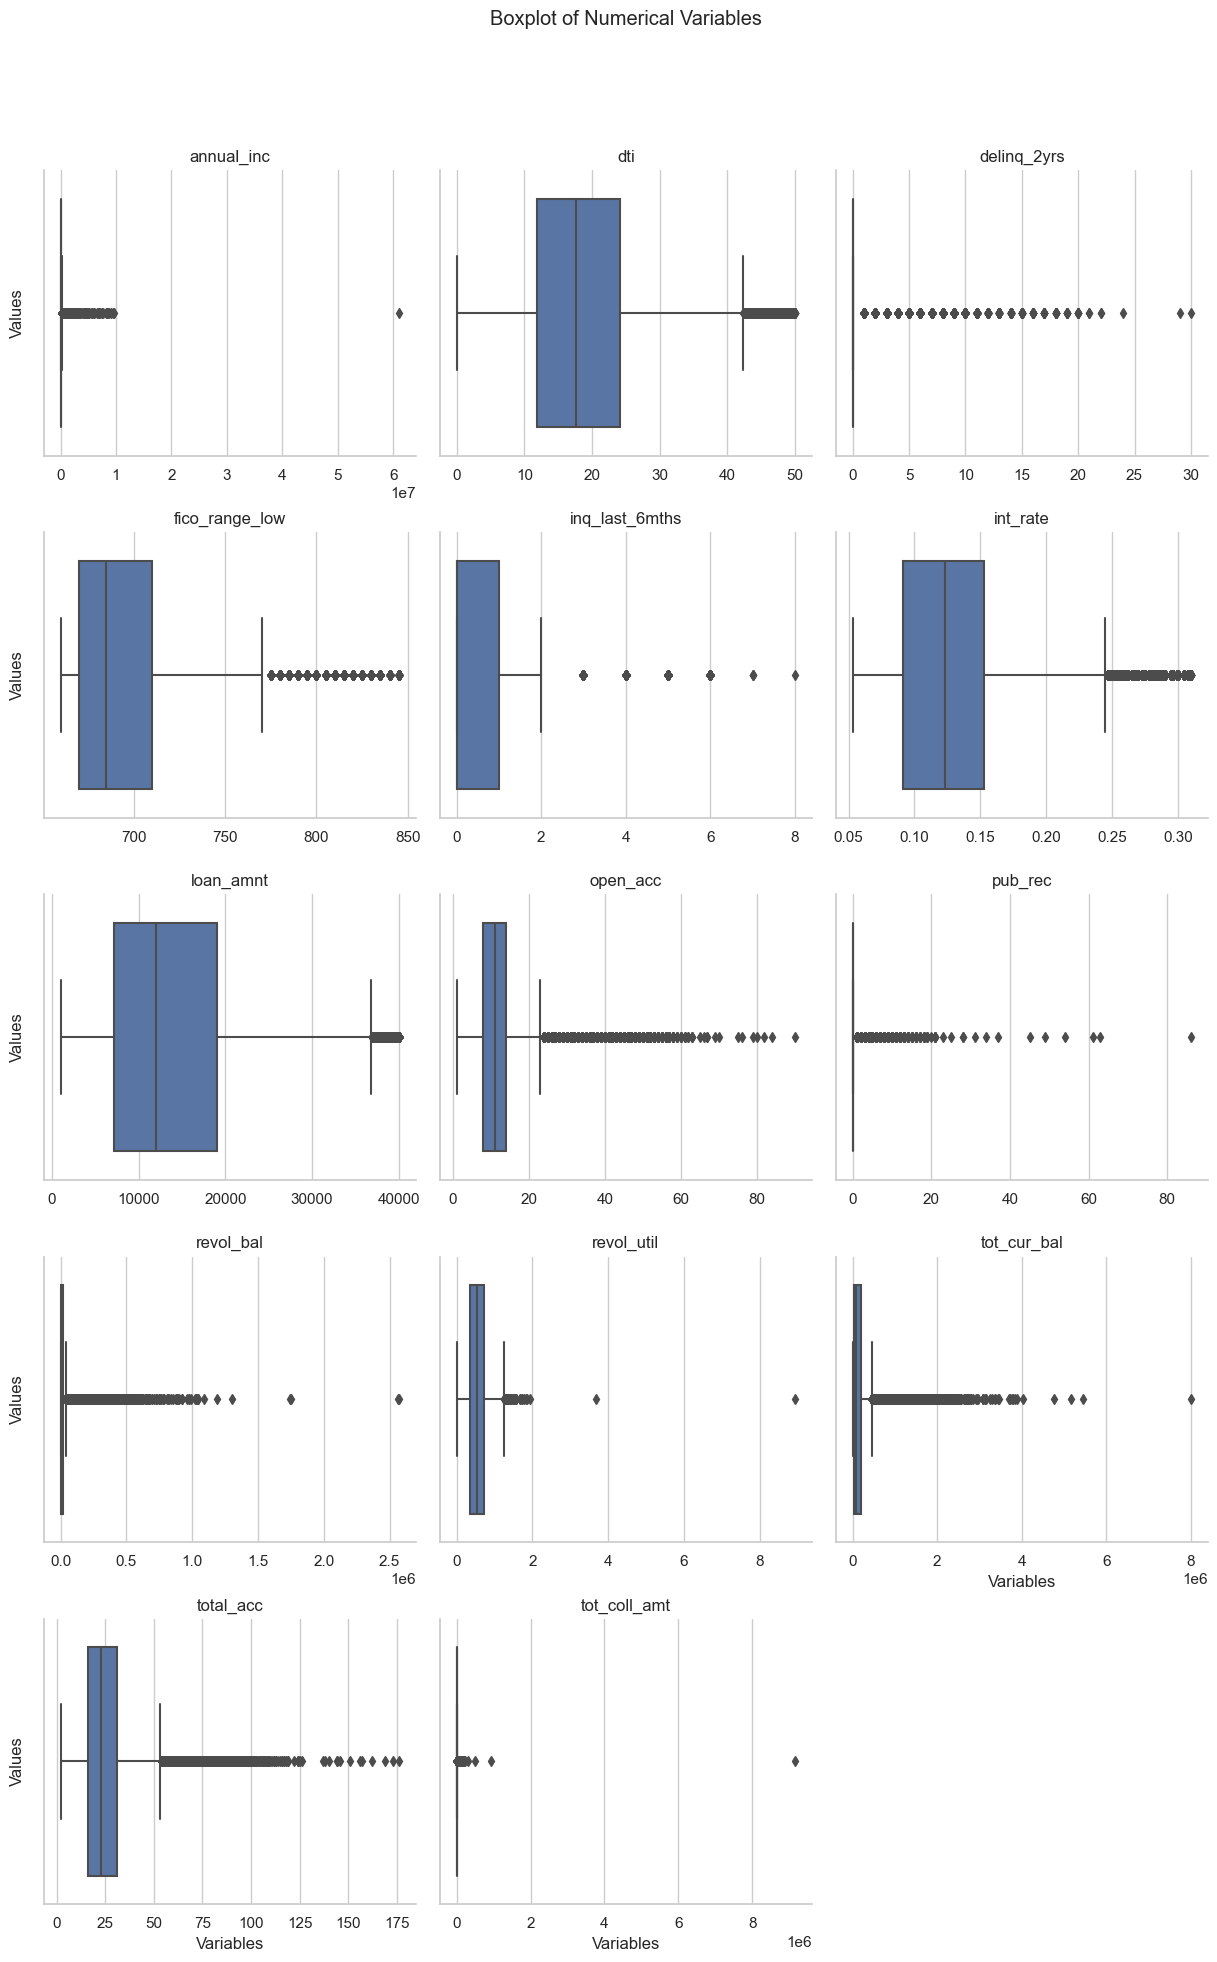

In [9]:
# 연속형 변수들의 리스트 저장
numeric_columns = ['annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low', 'inq_last_6mths', 'int_rate', 'loan_amnt', 'open_acc', 'pub_rec','revol_bal', 'revol_util', 'tot_cur_bal', 'total_acc', 'tot_coll_amt']
# 데이터를 "variable"과 "value" 열로 재구조화
melted_df = df.melt(var_name="variable", value_name="value", value_vars=numeric_columns)

# FacetGrid를 사용하여 boxplot 그리기
sns.set(style="whitegrid")
g = sns.FacetGrid(melted_df, col ="variable", col_wrap=3, height=4, sharex=False, sharey=False)
g.map(sns.boxplot, "value")
g.set_titles("{col_name}")
g.set_xlabels("Variables")
g.set_ylabels("Values")
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Boxplot of Numerical Variables")
plt.show()

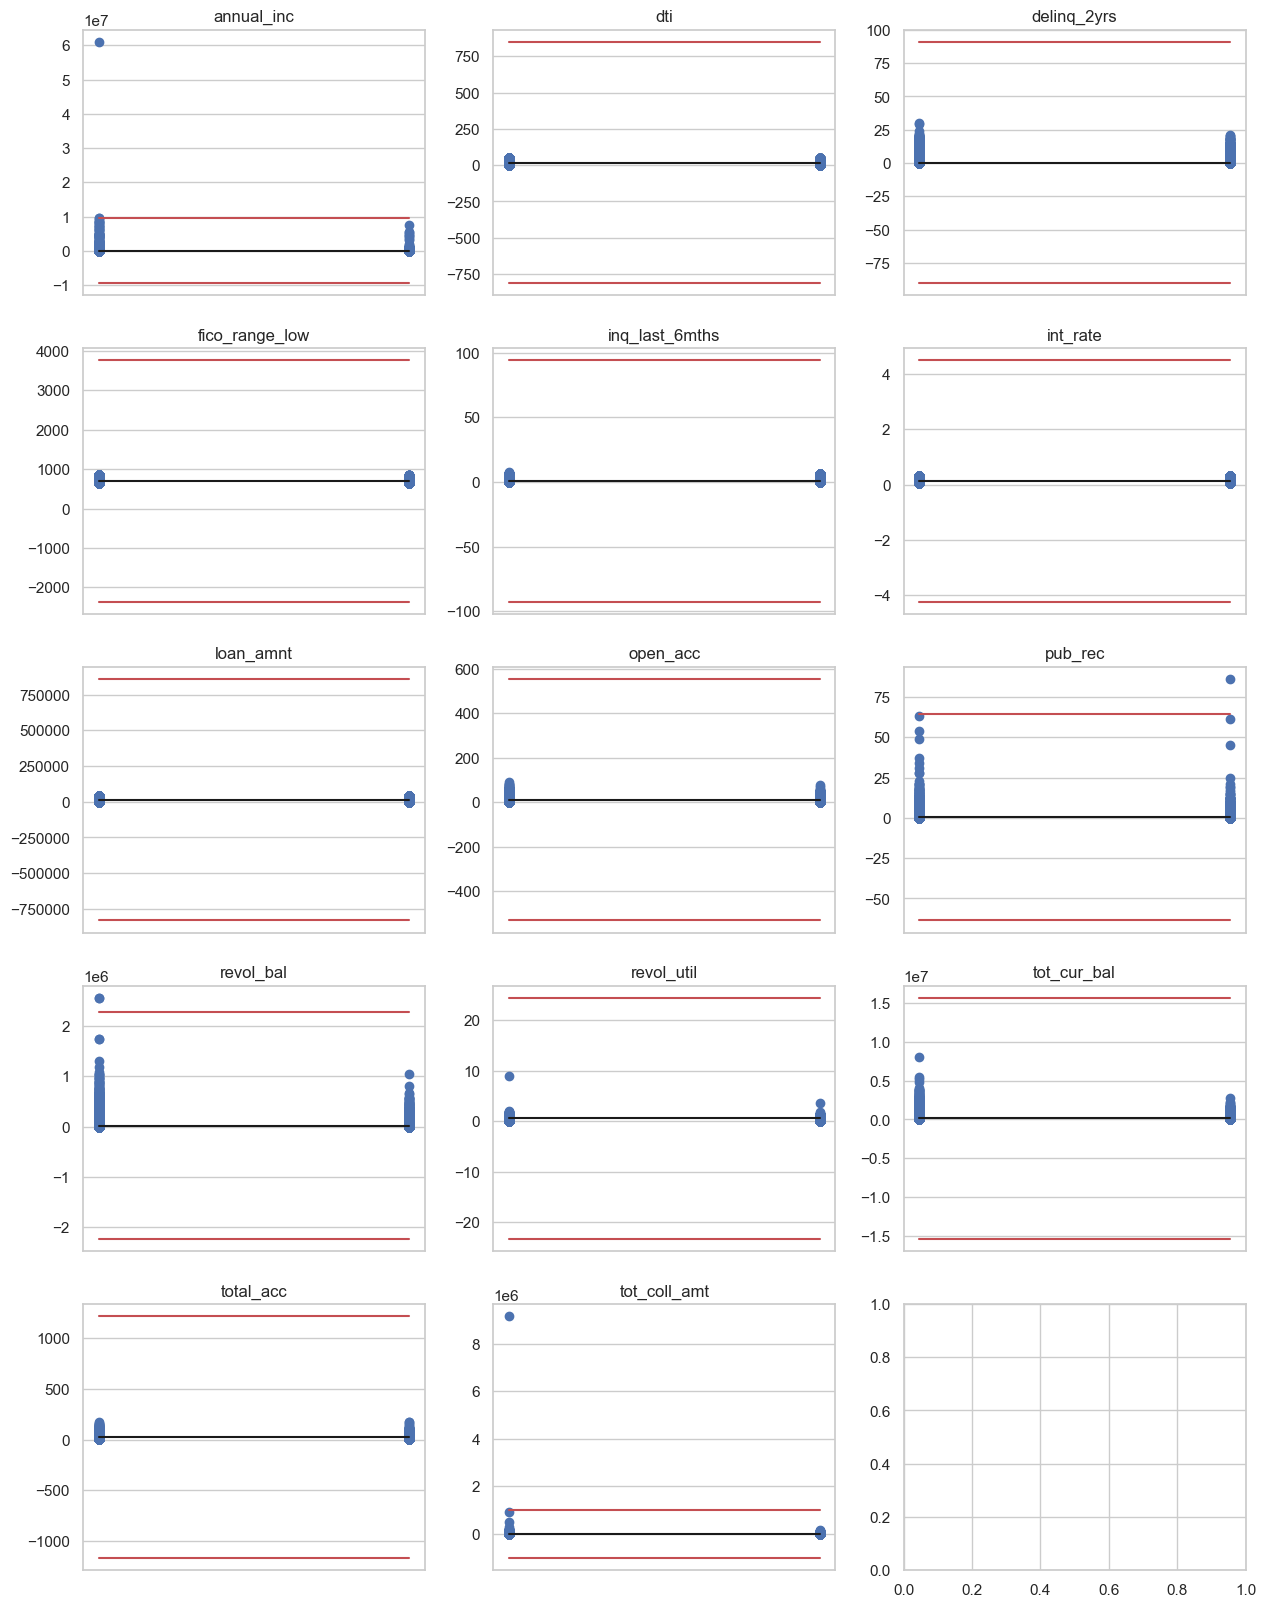

In [10]:
# 이상치 제거를 위한 인덱스 파악
fig, axes = plt.subplots(5, 3, figsize=(15, 20))
for i in range(len(numeric_columns)):
    check_name = numeric_columns[i]
    name_list = ['index', check_name, 'loan_not_access']
    y_mean = df[check_name].mean(axis=0)
    y_std = df[check_name].std(axis=0)
    globals()[f'new_df_{check_name}'] = df[name_list].sort_values(by=check_name, ascending=False)
    if i == 14:  # 15번째를 빈 공간으로 남김
        ax.axis('off')
    else:
        # loan_not_access에 따른 수치형 변수들의 값
        # 검은 선은 평균, 빨간 선은 평균+100*표준편차, 평균-100*표준편차 선
        row = i // 3
        col = i % 3
        ax = axes[row, col]
        ax.scatter(globals()[f'new_df_{check_name}']['loan_not_access'], globals()[f'new_df_{check_name}'][check_name])  # 원하는 데이터로 그래프를 그릴 수 있습니다.
        ax.plot([0,1],[y_mean,y_mean],'k')
        ax.plot([0,1],[y_mean+100*y_std,y_mean+100*y_std],'r')
        ax.plot([0,1],[y_mean-100*y_std,y_mean-100*y_std],'r')
        ax.set_xticks([])
        ax.set_title(check_name)

In [11]:
# 100시그마를 기준으로 너무 떨어져 있는 annual_inc, pub_rec, revol_bal, tot_coll_amt 가장 큰 1개씩 제거하기 위한 index파악
delete_index = []
delete_index.append(new_df_annual_inc['index'].values[0])
delete_index.append(new_df_pub_rec['index'].values[0])
delete_index.append(new_df_revol_bal['index'].values[0])
delete_index.append(new_df_tot_coll_amt['index'].values[0])
print(delete_index)

[331118, 829091, 474252, 733418]


In [12]:
# 인덱스 제거
data_df = df.copy()
for k in range(df.shape[0]):
    if df['index'].values[k] in delete_index:
        data_df = data_df.drop(k, axis=0)

In [13]:
data_df.shape

(874331, 335)

#### 1.2.1.2 더미 변수

In [14]:
# 더미 변수들을 하나의 열로 합치는 함수
def combine_dummy_variables(row):
    for i, col in enumerate(dummy_cols):
        if row[col] == 1:
            return i + 1
    return None

# 더미 변수들을 하나의 열로 합치기
dummy_cols = ['home_ownership' + str(i) for i in range(1,7)]
data_df['home_ownership'] = data_df.apply(combine_dummy_variables, axis=1)
dummy_cols = ['verification_status' + str(i) for i in range(1,4)]
data_df['verification_status'] = data_df.apply(combine_dummy_variables, axis=1)
dummy_cols = ['purpose' + str(i) for i in range(1,15)]
data_df['purpose'] = data_df.apply(combine_dummy_variables, axis=1)
dummy_cols = ['initial_list_status' + str(i) for i in range(1,3)]
data_df['initial_list_status'] = data_df.apply(combine_dummy_variables, axis=1)
dummy_cols = ['emp_length' + str(i) for i in range(1,13)]
data_df['emp_length'] = data_df.apply(combine_dummy_variables, axis=1)
dummy_cols = ['addr_state' + str(i) for i in range(1,52)]
data_df['addr_state'] = data_df.apply(combine_dummy_variables, axis=1)

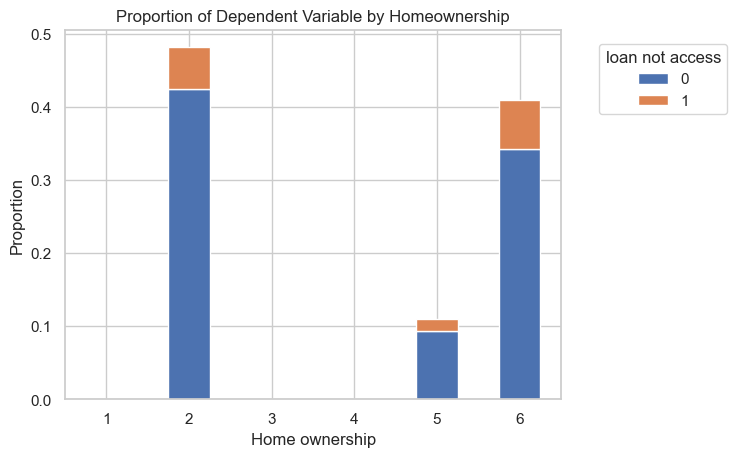

In [15]:
# home_ownership
# 각 라벨의 개수를 계산하여 비율로 변환
total_count = len(data_df)
label_proportions = data_df.groupby(['home_ownership', 'loan_not_access']).size().unstack().div(total_count)

# 막대 그래프 그리기
sns.set(style="whitegrid")
ax = label_proportions.plot(kind='bar', stacked=True)
plt.xlabel("Home ownership")
plt.ylabel("Proportion")
plt.title("Proportion of Dependent Variable by Homeownership")
plt.legend(title='loan not access',loc='lower right', bbox_to_anchor=(1.35,0.75))
plt.xticks(rotation=0)
plt.show()

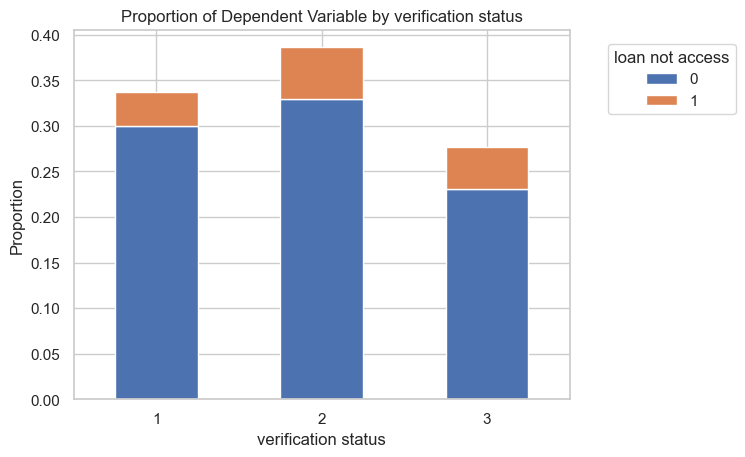

In [16]:
# verification_status
# 각 라벨의 개수를 계산하여 비율로 변환
total_count = len(data_df)
label_proportions = data_df.groupby(['verification_status', 'loan_not_access']).size().unstack().div(total_count)

# 막대 그래프 그리기
sns.set(style="whitegrid")
ax = label_proportions.plot(kind='bar', stacked=True)
plt.xlabel("verification status")
plt.ylabel("Proportion")
plt.title("Proportion of Dependent Variable by verification status")
plt.legend(title='loan not access',loc='lower right', bbox_to_anchor=(1.35,0.75))
plt.xticks(rotation=0)
plt.show()

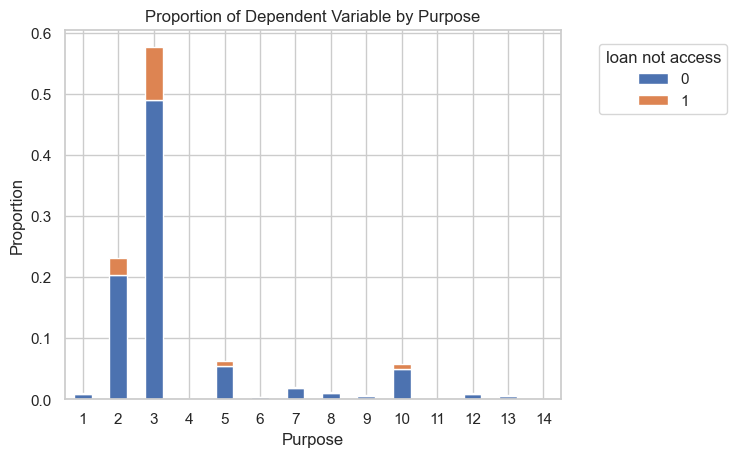

In [17]:
# purpose
# 각 라벨의 개수를 계산하여 비율로 변환
total_count = len(data_df)
label_proportions = data_df.groupby(['purpose', 'loan_not_access']).size().unstack().div(total_count)

# 막대 그래프 그리기
sns.set(style="whitegrid")
ax = label_proportions.plot(kind='bar', stacked=True)
plt.xlabel("Purpose")
plt.ylabel("Proportion")
plt.title("Proportion of Dependent Variable by Purpose")
plt.legend(title='loan not access',loc='lower right', bbox_to_anchor=(1.35,0.75))
plt.xticks(rotation=0)
plt.show()

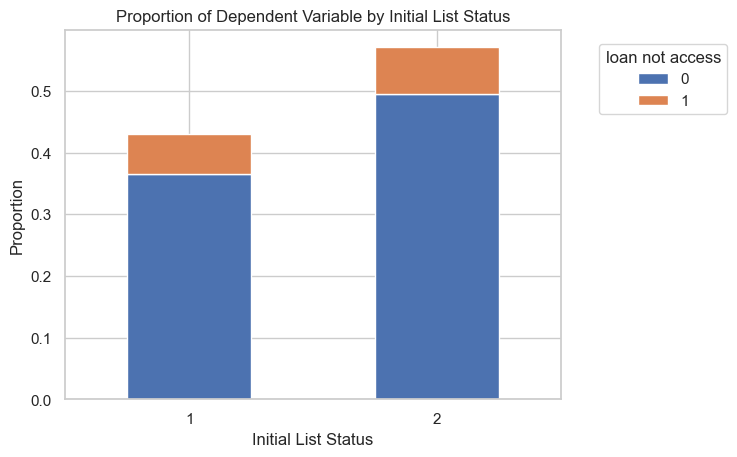

In [18]:
#initial_list_status
# 각 라벨의 개수를 계산하여 비율로 변환
total_count = len(data_df)
label_proportions = data_df.groupby(['initial_list_status', 'loan_not_access']).size().unstack().div(total_count)

# 막대 그래프 그리기
sns.set(style="whitegrid")
ax = label_proportions.plot(kind='bar', stacked=True)
plt.xlabel("Initial List Status")
plt.ylabel("Proportion")
plt.title("Proportion of Dependent Variable by Initial List Status")
plt.legend(title='loan not access',loc='lower right', bbox_to_anchor=(1.35,0.75))
plt.xticks(rotation=0)
plt.show()

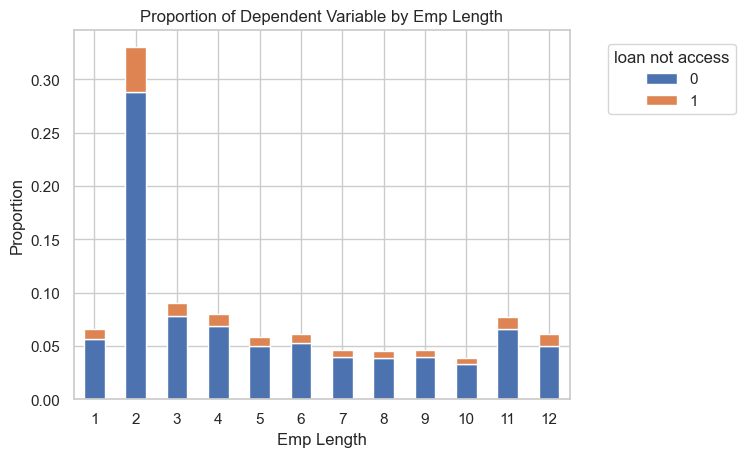

In [19]:
# emp_length
# 각 라벨의 개수를 계산하여 비율로 변환
total_count = len(data_df)
label_proportions = data_df.groupby(['emp_length', 'loan_not_access']).size().unstack().div(total_count)

# 막대 그래프 그리기
sns.set(style="whitegrid")
ax = label_proportions.plot(kind='bar', stacked=True)
plt.xlabel("Emp Length")
plt.ylabel("Proportion")
plt.title("Proportion of Dependent Variable by Emp Length")
plt.legend(title='loan not access',loc='lower right', bbox_to_anchor=(1.35,0.75))
plt.xticks(rotation=0)
plt.show()

### 1.2.2 설명변수와 반응변수 독립성  검정

1.2.2.1 설명변수가 연속형 변수일 때

In [20]:
continuous_variables = ['loan_amnt', 'annual_inc', 'int_rate', 'dti', 'tot_coll_amt','revol_util']
for x in continuous_variables:
    # 데이터프레임에서 'depvar'와 x 열만 추출
    df_subset = data_df[['loan_not_access', x]]

    # 'depvar'가 0인 경우와 1인 경우로 데이터 분리
    group_0 = df_subset[df_subset['loan_not_access'] == 0][x]
    group_1 = df_subset[df_subset['loan_not_access'] == 1][x]

    # 독립표본 t-검정 수행
    t_stat, p_value = ttest_ind(group_0, group_1, equal_var=False)

    # 결과 출력
    print(f"{x}변수에 대한 가설검정 결과")
    print("T-statistic:", t_stat)
    print("P-value:", p_value, '\n')

loan_amnt변수에 대한 가설검정 결과
T-statistic: -18.353654921326743
P-value: 3.6672221628520066e-75 

annual_inc변수에 대한 가설검정 결과
T-statistic: 42.75431435922717
P-value: 0.0 

int_rate변수에 대한 가설검정 결과
T-statistic: -179.01265374754288
P-value: 0.0 

dti변수에 대한 가설검정 결과
T-statistic: -72.8836299942885
P-value: 0.0 

tot_coll_amt변수에 대한 가설검정 결과
T-statistic: -1.0030317373358733
P-value: 0.3158468701909207 

revol_util변수에 대한 가설검정 결과
T-statistic: -33.782527788180786
P-value: 2.4662483726944285e-249 



1.2.2.2 설명변수가 이산형 변수일때 검정

In [21]:
categorical_variables = ['home_ownership', 'verification_status', 'purpose','initial_list_status', 'emp_length', 'addr_state']
for x in categorical_variables:
    # 데이터프레임에서 'depvar'와 x 열만 추출
    df_subset = data_df[['loan_not_access', x]]

    # x의 고유값들을 리스트로 추출
    categories = df_subset[x].unique()

    # 각 그룹별로 데이터 분리
    groups = [df_subset[df_subset[x] == category]['loan_not_access'] for category in categories]

    # 일원배치 분산분석 수행
    f_stat, p_value = f_oneway(*groups)

    # 결과 출력
    print(f"{x}변수에 대한 가설검정 결과")
    print("F-statistic:", f_stat)
    print("P-value:", p_value, '\n')


home_ownership변수에 대한 가설검정 결과
F-statistic: 654.5622394974224
P-value: 0.0 

verification_status변수에 대한 가설검정 결과
F-statistic: 1893.3681650668823
P-value: 0.0 

purpose변수에 대한 가설검정 결과
F-statistic: 129.9184707248137
P-value: 0.0 

initial_list_status변수에 대한 가설검정 결과
F-statistic: 554.4219944918299
P-value: 1.5008099541155718e-122 

emp_length변수에 대한 가설검정 결과
F-statistic: 142.54038875709145
P-value: 0.0 

addr_state변수에 대한 가설검정 결과
F-statistic: 26.992936846769222
P-value: 1.8267156612980722e-249 



In [22]:
data_df2 = data_df[['loan_not_access', 'loan_amnt', 'int_rate', 'annual_inc', 'dti',
        'delinq_2yrs', 'open_acc', 'fico_range_low',
        'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal',
        'chargeoff_within_12_mths', 'pub_rec_bankruptcies', 'tax_liens',
        'emp_length1', 'emp_length2', 'emp_length3', 'emp_length4',
        'emp_length5', 'emp_length6', 'emp_length7', 'emp_length8',
        'emp_length9', 'emp_length10', 'emp_length11', 'emp_length12',
        'home_ownership1', 'home_ownership2', 'home_ownership3',
        'home_ownership4', 'home_ownership5', 'home_ownership6',
        'verification_status1', 'verification_status2', 'verification_status3',
        'purpose1', 'purpose2', 'purpose3', 'purpose4', 'purpose5', 'purpose6',
        'purpose7', 'purpose8', 'purpose9', 'purpose10', 'purpose11',
        'purpose12', 'purpose13', 'purpose14', 'addr_state1', 'addr_state2',
        'addr_state3', 'addr_state4', 'addr_state5', 'addr_state6',
        'addr_state7', 'addr_state8', 'addr_state9', 'addr_state10',
        'addr_state11', 'addr_state12', 'addr_state13', 'addr_state14',
        'addr_state15', 'addr_state16', 'addr_state17', 'addr_state18',
        'addr_state19', 'addr_state20', 'addr_state21', 'addr_state22',
        'addr_state23', 'addr_state24', 'addr_state25', 'addr_state26',
        'addr_state27', 'addr_state28', 'addr_state29', 'addr_state30',
        'addr_state31', 'addr_state32', 'addr_state33', 'addr_state34',
        'addr_state35', 'addr_state36', 'addr_state37', 'addr_state38',
        'addr_state39', 'addr_state40', 'addr_state41', 'addr_state42',
        'addr_state43', 'addr_state44', 'addr_state45', 'addr_state46',
        'addr_state47', 'addr_state48', 'addr_state49', 'addr_state50',
        'addr_state51', 'initial_list_status1', 'initial_list_status2', 'term1']]


In [23]:
print(data_df.shape)
print(data_df2.shape)

(874331, 341)
(874331, 107)


#### 1.2.4.2 (0비율이 매우 높은) 영향이 없는 변수 제거

In [24]:
for i in data_df2.columns:
    print(f"{i} 변수의 0 비율 {len(data_df2[data_df2[i] == 0])/len(data_df2[i])}\n")

loan_not_access 변수의 0 비율 0.8595623396631253

loan_amnt 변수의 0 비율 0.0

int_rate 변수의 0 비율 0.0

annual_inc 변수의 0 비율 0.0

dti 변수의 0 비율 0.0002996576811299153

delinq_2yrs 변수의 0 비율 0.7961801651777187

open_acc 변수의 0 비율 0.0

fico_range_low 변수의 0 비율 0.0

pub_rec 변수의 0 비율 0.8258245447090404

revol_bal 변수의 0 비율 0.0027941363167953556

revol_util 변수의 0 비율 0.003433482285312999

total_acc 변수의 0 비율 0.0

acc_now_delinq 변수의 0 비율 0.9945935806919805

tot_coll_amt 변수의 0 비율 0.8440441892143822

tot_cur_bal 변수의 0 비율 0.00014982884056495766

chargeoff_within_12_mths 변수의 0 비율 0.9915215175945952

pub_rec_bankruptcies 변수의 0 비율 0.8778997885240258

tax_liens 변수의 0 비율 0.9628676096352525

emp_length1 변수의 0 비율 0.9344195733652358

emp_length2 변수의 0 비율 0.6699739572313003

emp_length3 변수의 0 비율 0.9097675823000672

emp_length4 변수의 0 비율 0.9200577355715398

emp_length5 변수의 0 비율 0.941699425046121

emp_length6 변수의 0 비율 0.9387074231612513

emp_length7 변수의 0 비율 0.9535427658403969

emp_length8 변수의 0 비율 0.9551908830866114

emp_leng

In [25]:
for i in data_df2.columns:
    if len(data_df2[data_df2[i] == 0])/len(data_df2[i]) > 0.997:
        print(f"{i} 변수의 0 비율 {len(data_df2[data_df2[i] == 0])/len(data_df2[i])}\n")

home_ownership1 변수의 0 비율 0.9996557367861828

home_ownership3 변수의 0 비율 0.9999599693937422

home_ownership4 변수의 0 비율 0.9999588256621348

purpose4 변수의 0 비율 0.9999988562683927

purpose11 변수의 0 비율 0.9993366356677277

purpose14 변수의 0 비율 0.9992131126541322

addr_state1 변수의 0 비율 0.9975375458493408

addr_state8 변수의 0 비율 0.9974403286627147

addr_state9 변수의 0 비율 0.9971509645660511

addr_state13 변수의 0 비율 0.9999977125367853

addr_state14 변수의 0 비율 0.9990873021773219

addr_state22 변수의 0 비율 0.9986343844608049

addr_state27 변수의 0 비율 0.9970766220115723

addr_state29 변수의 0 비율 0.9988516934662044

addr_state30 변수의 0 비율 0.997578720187206

addr_state42 변수의 0 비율 0.9979618702756736

addr_state47 변수의 0 비율 0.9979309895222748

addr_state51 변수의 0 비율 0.9978543595045812



In [26]:
for i in data_df2.columns:
    if len(data_df2[data_df2[i] == 0])/len(data_df2[i]) > 0.997:
        data_df2 = data_df2.drop(i, axis=1)

In [27]:
data_df2

,loan_not_access,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,open_acc,fico_range_low,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,tot_coll_amt,tot_cur_bal,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens,emp_length1,emp_length2,emp_length3,emp_length4,emp_length5,emp_length6,emp_length7,emp_length8,emp_length9,emp_length10,emp_length11,emp_length12,home_ownership2,home_ownership5,home_ownership6,verification_status1,verification_status2,verification_status3,purpose1,purpose2,purpose3,purpose5,purpose6,purpose7,purpose8,purpose9,purpose10,purpose12,purpose13,addr_state2,addr_state3,addr_state4,addr_state5,addr_state6,addr_state7,addr_state10,addr_state11,addr_state12,addr_state15,addr_state16,addr_state17,addr_state18,addr_state19,addr_state20,addr_state21,addr_state23,addr_state24,addr_state25,addr_state26,addr_state28,addr_state31,addr_state32,addr_state33,addr_state34,addr_state35,addr_state36,addr_state37,addr_state38,addr_state39,addr_state40,addr_state41,addr_state43,addr_state44,addr_state45,addr_state46,addr_state48,addr_state49,addr_state50,initial_list_status1,initial_list_status2,term1
0,1,12000,0.0789,90641.0,10.20,0,5,690,0,5673,0.405,20,0,0,27898,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1,0,14000,0.1147,46000.0,17.40,1,9,670,0,10285,0.664,18,0,0,19286,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,0,24000,0.1147,90000.0,11.73,2,6,660,0,18989,0.474,10,0,0,324923,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,0,14000,0.0949,115000.0,7.31,0,16,660,0,16451,0.401,22,0,250,16451,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,0,14000,0.0999,78000.0,24.32,0,17,685,0,25930,0.534,30,0,0,105053,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
874330,0,32000,0.1875,90000.0,27.39,0,14,735,0,91190,0.813,17,0,0,182697,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
874331,0,24000,0.0692,76000.0,34.20,0,16,685,0,38338,0.844,24,0,320,69905,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1
874332,0,4000,0.0662,24960.0,25.29,0,15,790,0,3397,0.092,26,0,0,14190,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
874333,0,8000,0.1288,53000.0,18.07,2,10,680,1,3304,0.370,24,0,0,20751,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
